# <span style="color: #69230aff;">🍿 **Popchip Customer Sentiment Analysis Project**</span>

## <span style="color: #8f5a1dff;">Business Objective</span>
As a Data Scientist at Popchip, I'm conducting a comprehensive customer feedback analysis for our new flavor launch to:
- **Assess overall customer satisfaction** with the new product using sentiment analysis
- **Identify specific pain points** requiring immediate attention  
- **Discover positive aspects** to leverage in marketing campaigns
- **Visualize customer emotion patterns** through sentiment-based word clouds
- **Extract actionable keywords** for data-driven marketing optimization
- **Design A/B testing strategies** based on customer sentiment insights
- **Provide strategic recommendations** for product improvement and business growth

## <span style="color: #8f5a1dff;">Comprehensive Methodology</span>
- **VADER Sentiment Analysis**: Measure customer emotion (positive/negative/neutral) with compound scoring
- **Word Cloud Visualization**: 
  - Sentiment-based clouds (positive vs negative words)
  - Frequency-based clouds (most vs least used terms for A/B testing)
- **Text Vectorization**: Count vectorization to identify discussion topics and business insights
- **A/B Testing Strategy**: Data-driven marketing experiments using sentiment and keyword insights
- **Business Intelligence**: Translate NLP outputs into actionable strategic recommendations

## <span style="color: #87CEEB;">1. Data Loading and Exploration</span>

In [ ]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import spacy
import nltk

# Load the dataset
pd.set_option('max_colwidth', None)
df = pd.read_excel('Popchip_Reviews.xlsx')

# Check if the dataset is loaded correctly
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

df.head()

Dataset loaded successfully!
Shape: (564, 6)


,Id,UserId,Rating,Priority,Title,Text
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan garlic to scoop up cottage cheese as a healthy alternative to chips and dip. My healthy eating program is saved.
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,"I like the puffed nature of this chip that makes it more unique in the chip market. I ordered the Salt and Vinegar and absolutely love that flavor, hands down my favorite chip ever. I have tried the cheddar and regular flavors as well. The cheddar is about a 4/5 and the regular is about a 3/5 because I prefer strong flavors and obviously that would not be the case for the regular. The Salt and Vinegar is kind of weak compared to some regular S&V chips, but is quite flavorful and makes you wanting to come back for more."
2,23691,A30NYUHEDLWI0Y,5,Low,Great Alternative to Potato Chips,"I just love these chips! I was always a big fan of potato chips, but haven't had one since I discovered popchips. They are great for dipping or all alone. I am constantly re-ordering them. One note however-if you are on a low salt diet these chips are probably not for you. They are high in sodium. We go through a case every two months. If you love them it pays to join the subscribe and save program through Amazon. You save money and stay supplied!"
3,23692,A2NU55U9LKTB5J,3,High,Not somthing I would crave,"These tasted like potatoe stix, that we got in grade school with our lunches usually on pizza day. They were the bomb then, not so much now. Won't buy again unless I get them for cheap or free."
4,23693,A225F7QFP5LIW2,5,Low,healthy and delicious,"These chips are great! They look almost like a flattened rice cake, but taste so much better, more like a potato chip. The bbq flavor is delicious. They are very low in fat and full of flavor. It is easy to eat an entire bag of these!"


In [ ]:
# Explore dataset structure
print("=== DATASET INFO ===")
df.info()
         
print(f"\n=== MISSING VALUES ===")
print(df.isnull().sum())

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        564 non-null    int64 
 1   UserId    564 non-null    object
 2   Rating    564 non-null    int64 
 3   Priority  564 non-null    object
 4   Title     564 non-null    object
 5   Text      564 non-null    object
dtypes: int64(2), object(4)
memory usage: 26.6+ KB

=== MISSING VALUES ===
Id          0
UserId      0
Rating      0
Priority    0
Title       0
Text        0
dtype: int64


In [173]:
# Check Priority column distribution
print("Priority column distribution:")
print(df.Priority.value_counts())


# NOT SURE WOULD NEED THIS. IF the column is any relevant to the analysis, we can keep it
## As there is no context to what this field is referencing

Priority column distribution:
Priority
Low     447
High    117
Name: count, dtype: int64


## <span style="color: #87CEEB;">2. Data Cleaning</span>

In [174]:
df.head()

,Id,UserId,Rating,Priority,Title,Text
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan garlic to scoop up cottage cheese as a healthy alternative to chips and dip. My healthy eating program is saved.
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,"I like the puffed nature of this chip that makes it more unique in the chip market. I ordered the Salt and Vinegar and absolutely love that flavor, hands down my favorite chip ever. I have tried the cheddar and regular flavors as well. The cheddar is about a 4/5 and the regular is about a 3/5 because I prefer strong flavors and obviously that would not be the case for the regular. The Salt and Vinegar is kind of weak compared to some regular S&V chips, but is quite flavorful and makes you wanting to come back for more."
2,23691,A30NYUHEDLWI0Y,5,Low,Great Alternative to Potato Chips,"I just love these chips! I was always a big fan of potato chips, but haven't had one since I discovered popchips. They are great for dipping or all alone. I am constantly re-ordering them. One note however-if you are on a low salt diet these chips are probably not for you. They are high in sodium. We go through a case every two months. If you love them it pays to join the subscribe and save program through Amazon. You save money and stay supplied!"
3,23692,A2NU55U9LKTB5J,3,High,Not somthing I would crave,"These tasted like potatoe stix, that we got in grade school with our lunches usually on pizza day. They were the bomb then, not so much now. Won't buy again unless I get them for cheap or free."
4,23693,A225F7QFP5LIW2,5,Low,healthy and delicious,"These chips are great! They look almost like a flattened rice cake, but taste so much better, more like a potato chip. The bbq flavor is delicious. They are very low in fat and full of flavor. It is easy to eat an entire bag of these!"


In [ ]:
# Remove unnecessary columns for sentiment analysis. Keep relevant columns for quick reference, Rating and Text for analysis

df.drop(columns=['Id', 'UserId', 'Priority'], axis=1, inplace=True)

print("Cleaned dataset shape:", df.shape)

print("Remaining columns:", df.columns.tolist())

Cleaned dataset shape: (564, 3)
Remaining columns: ['Rating', 'Title', 'Text']


In [176]:
# Preview cleaned dataset
df.head()

,Rating,Title,Text
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan garlic to scoop up cottage cheese as a healthy alternative to chips and dip. My healthy eating program is saved.
1,5,Great chip that is different from the rest,"I like the puffed nature of this chip that makes it more unique in the chip market. I ordered the Salt and Vinegar and absolutely love that flavor, hands down my favorite chip ever. I have tried the cheddar and regular flavors as well. The cheddar is about a 4/5 and the regular is about a 3/5 because I prefer strong flavors and obviously that would not be the case for the regular. The Salt and Vinegar is kind of weak compared to some regular S&V chips, but is quite flavorful and makes you wanting to come back for more."
2,5,Great Alternative to Potato Chips,"I just love these chips! I was always a big fan of potato chips, but haven't had one since I discovered popchips. They are great for dipping or all alone. I am constantly re-ordering them. One note however-if you are on a low salt diet these chips are probably not for you. They are high in sodium. We go through a case every two months. If you love them it pays to join the subscribe and save program through Amazon. You save money and stay supplied!"
3,3,Not somthing I would crave,"These tasted like potatoe stix, that we got in grade school with our lunches usually on pizza day. They were the bomb then, not so much now. Won't buy again unless I get them for cheap or free."
4,5,healthy and delicious,"These chips are great! They look almost like a flattened rice cake, but taste so much better, more like a potato chip. The bbq flavor is delicious. They are very low in fat and full of flavor. It is easy to eat an entire bag of these!"


## <span style="color: #87CEEB;">3. Text Preprocessing with Pandas and Spacy</span>
Preparing text data for sentiment analysis and topic modeling.

In [177]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [178]:
#Pandas
def lower_replace(series):
    output = series.str.lower()
    output = output.str.replace(r'[^\w\s]', '', regex=True)
    output = output.str.replace(r'\s+', ' ', regex=True)
    return output
#Spacy
def token_lemma_nonstop(text):
    doc = nlp(text)
    norm = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(norm)



def nlp_pipeline(series):
    """the function applies the nlp pipeline to the text series."""
    series = lower_replace(series)
    series = series.apply(token_lemma_nonstop)
    return series

In [179]:
df['Processed_Text']=nlp_pipeline(df['Text'])
df.head()

,Rating,Title,Text,Processed_Text
0,5,Yummy snacks!,Popchips are the bomb!! I use the parmesan garlic to scoop up cottage cheese as a healthy alternative to chips and dip. My healthy eating program is saved.,popchip bomb use parmesan garlic scoop cottage cheese healthy alternative chip dip healthy eat program save
1,5,Great chip that is different from the rest,"I like the puffed nature of this chip that makes it more unique in the chip market. I ordered the Salt and Vinegar and absolutely love that flavor, hands down my favorite chip ever. I have tried the cheddar and regular flavors as well. The cheddar is about a 4/5 and the regular is about a 3/5 because I prefer strong flavors and obviously that would not be the case for the regular. The Salt and Vinegar is kind of weak compared to some regular S&V chips, but is quite flavorful and makes you wanting to come back for more.",like puff nature chip make unique chip market order salt vinegar absolutely love flavor hand favorite chip try cheddar regular flavor cheddar 45 regular 35 prefer strong flavor obviously case regular salt vinegar kind weak compare regular sv chip flavorful make want come
2,5,Great Alternative to Potato Chips,"I just love these chips! I was always a big fan of potato chips, but haven't had one since I discovered popchips. They are great for dipping or all alone. I am constantly re-ordering them. One note however-if you are on a low salt diet these chips are probably not for you. They are high in sodium. We go through a case every two months. If you love them it pays to join the subscribe and save program through Amazon. You save money and stay supplied!",love chip big fan potato chip not discover popchip great dipping constantly reorder note howeverif low salt diet chip probably high sodium case month love pay join subscribe save program amazon save money stay supply
3,3,Not somthing I would crave,"These tasted like potatoe stix, that we got in grade school with our lunches usually on pizza day. They were the bomb then, not so much now. Won't buy again unless I get them for cheap or free.",taste like potatoe stix get grade school lunch usually pizza day bomb will not buy cheap free
4,5,healthy and delicious,"These chips are great! They look almost like a flattened rice cake, but taste so much better, more like a potato chip. The bbq flavor is delicious. They are very low in fat and full of flavor. It is easy to eat an entire bag of these!",chip great look like flattened rice cake taste well like potato chip bbq flavor delicious low fat flavor easy eat entire bag


## <span style="color: #87CEEB;">4. Sentiment Analysis with VADER</span>

VADER works best on unfiltered text as it relies on punctuation, capitalization, and intensifiers for sentiment detection.

In [180]:
# Install required packages (run once)
# pip install nltk

In [181]:
# Download VADER lexicon (run once)
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kojus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [182]:
# Initialize VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def sentiment_analysis(text):
    """
    Analyze sentiment using VADER
    Returns compound score: -1 (most negative) to +1 (most positive)
    """
    if isinstance(text, str):
        score = sid.polarity_scores(text)
        return score['compound']
    else:
        return None

# Test the function
print("Sentiment analyzer ready!")

Sentiment analyzer ready!


## <span style="color: #87CEEB;">5. WordCloud & Chart Visualizations</span>
Visual representation of sentiment patterns and keyword frequency analysis for marketing insights.

In [5]:
# Fix Warnings and Add Warning Control
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

print("✅ Warnings suppressed for cleaner output")

✅ Warnings suppressed for cleaner output


In [6]:
# Install wordcloud package and apply sentiment analysis
%pip install wordcloud

# Import libraries for word cloud visualization
from wordcloud import WordCloud


# Apply sentiment analysis to the dataset
df['sentiment_score'] = df['Text'].apply(sentiment_analysis)
# sentiment analysis is run on the 'Text' column to get 
# the unfiltered/unprocessed contexts (exclamations/characters/capital letters) of each review
# in identifying the tone of the reviews

# Create sentiment categories
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

print(f"\nWord cloud libraries installed and sentiment analysis applied!")
print(f"\nSentiment Distribution:")
print(df['sentiment_category'].value_counts())

Note: you may need to restart the kernel to use updated packages.


NameError: name 'sentiment_analysis' is not defined

---

### <span style="color: #98FB98;">🎯 Sentiment-Based Word Clouds</span>
Visualizing positive vs negative sentiment words to reinforce VADER analysis results.

In [184]:
df[df['sentiment_category'] == 'Positive']['Title'].isnull().sum()

np.int64(0)

Seeing there are no null vaues under the Title series; it can be used to have a snapshot of tyhe detailed review that accompanied it

The sentiment scores are not 100% reflective of the sentiment (positi9ve or negative of the Text reviews).

E.g; the 4th row- index wor 3- has a positive sentiment score. However, this is a neutral or slightly negative remark and should have been scored accordingly. The title gives the subject 'Not something I would crave'.

Index 23 has a 0.7 positive score- buty shold have been ghigher considering the new bbq flavour has been placed on a  montly subscription and the user or customer mentioned not to have anyother chips form other brands.



In [185]:
# NEW CELL - Create Negative Analysis DataFrames

from wordcloud import STOPWORDS

# Enhanced custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['chip', 'popchip', 'bag', 'chips', 'want', 'like', 'but', 'for', 'the', 'and', 'or', 'this', 'that', 'these', 'those', 'they', 'them', 'their', 'would', 'could', 'should', 'one', 'get', 'got', 'really', 'very', 'much', 'also', 'even', 'just', 'still', 'back', 'go', 'went', 'come', 'came', 'said', 'say', 'think', 'thought', 'know', 'knew', 'popchips', 'br', 'want'])

# Define the CountVectorizer for consistent analysis
cv_clean = CountVectorizer(
    stop_words=list(custom_stopwords),
    lowercase=True,
    ngram_range=(1, 2),  # Single words and 2-word phrases
    min_df=2,  # Must appear at least twice
    max_features=20  # Top 20 for clear visualization
)

print("🔧 Setup complete for positive AND negative analysis!")

🔧 Setup complete for positive AND negative analysis!


📊 TITLE KEYWORDS ANALYSIS: POSITIVE vs NEGATIVE


C:\Users\kojus\AppData\Local\Temp\ipykernel_16540\3649171765.py:47: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kojus\AppData\Local\Temp\ipykernel_16540\3649171765.py:47: UserWarning: Glyph 127871 (\N{POPCORN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\kojus\anaconda3\envs\sentimental_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kojus\anaconda3\envs\sentimental_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127871 (\N{POPCORN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


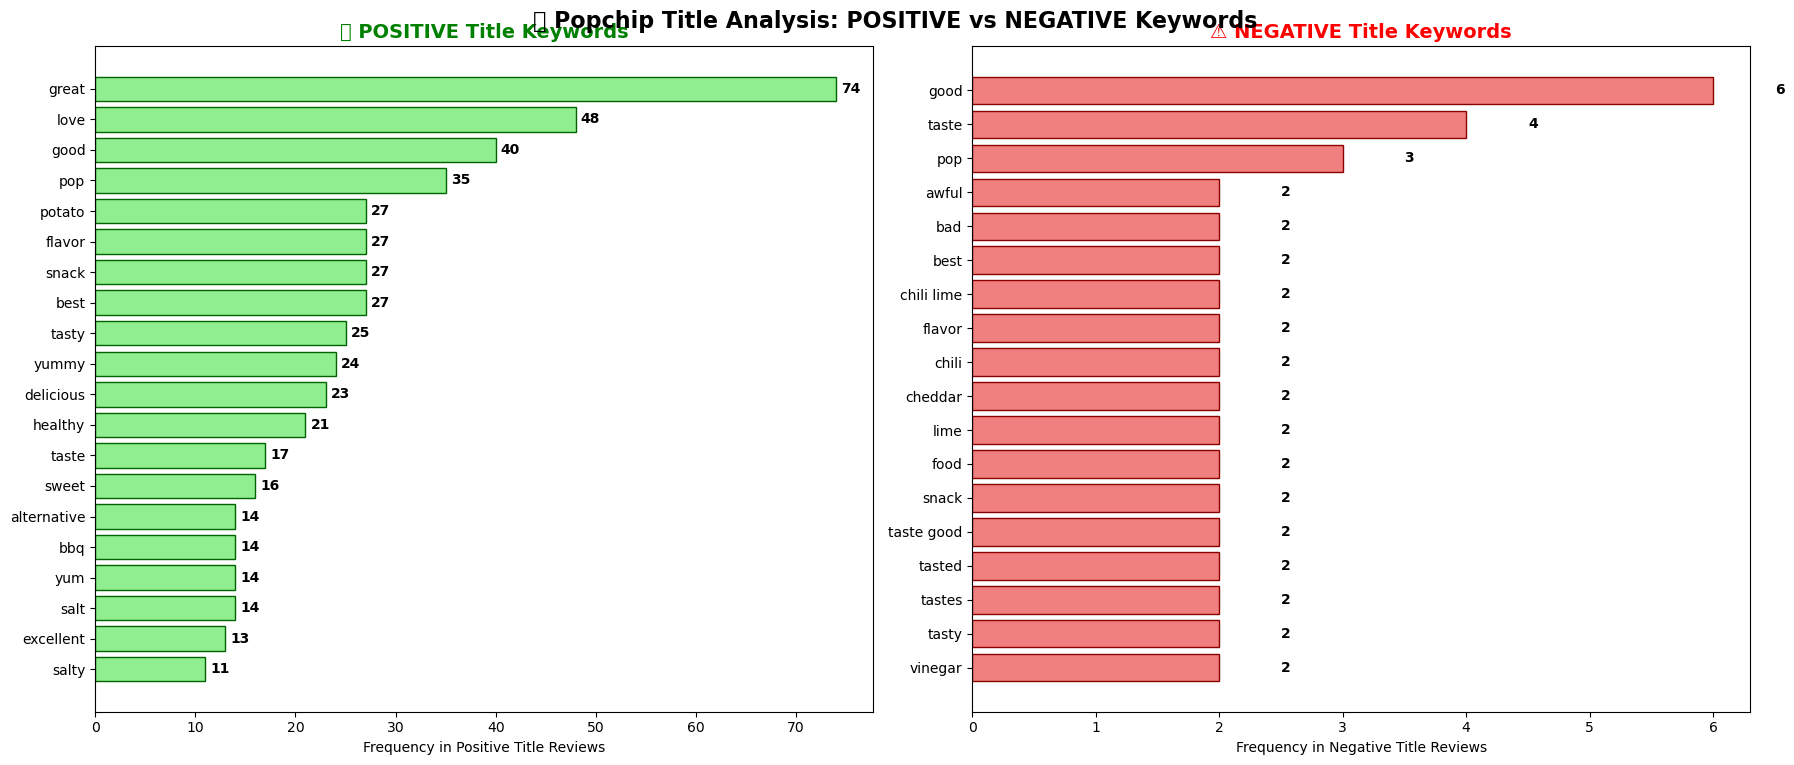


📈 TITLE ANALYSIS SUMMARY:
✅ Positive Title Reviews: 511
⚠️ Negative Title Reviews: 44


In [186]:
# NEW CELL - Title Keywords: Positive vs Negative Comparison

print("📊 TITLE KEYWORDS ANALYSIS: POSITIVE vs NEGATIVE")
print("=" * 55)

# Create subplot with 1x2 layout for title comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: POSITIVE Title Keywords (Left)
if not positive_titlewords_df.empty:
    y_pos = range(len(positive_titlewords_df))
    ax1.barh(y_pos, positive_titlewords_df['Frequency'], color='lightgreen', edgecolor='darkgreen')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(positive_titlewords_df['Keyword'])
    ax1.set_xlabel('Frequency in Positive Title Reviews')
    ax1.set_title('✅ POSITIVE Title Keywords', fontsize=14, fontweight='bold', color='green')
    ax1.invert_yaxis()
    
    # Add frequency labels
    for i, freq in enumerate(positive_titlewords_df['Frequency']):
        ax1.text(freq + 0.5, i, str(freq), va='center', fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'No Positive\nTitle Data', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=16, color='gray')
    ax1.set_title('✅ POSITIVE Title Keywords', fontsize=14, fontweight='bold', color='green')

# Chart 2: NEGATIVE Title Keywords (Right)
if not negative_titlewords_df.empty:
    y_pos = range(len(negative_titlewords_df))
    ax2.barh(y_pos, negative_titlewords_df['Frequency'], color='lightcoral', edgecolor='darkred')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(negative_titlewords_df['Keyword'])
    ax2.set_xlabel('Frequency in Negative Title Reviews')
    ax2.set_title('⚠️ NEGATIVE Title Keywords', fontsize=14, fontweight='bold', color='red')
    ax2.invert_yaxis()
    
    # Add frequency labels
    for i, freq in enumerate(negative_titlewords_df['Frequency']):
        ax2.text(freq + 0.5, i, str(freq), va='center', fontweight='bold')
else:
    ax2.text(0.5, 0.5, '🎉 EXCELLENT!\n\nNo Negative\nTitle Reviews', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=16, color='green', fontweight='bold')
    ax2.set_title('⚠️ NEGATIVE Title Keywords', fontsize=14, fontweight='bold', color='red')

plt.suptitle('🍿 Popchip Title Analysis: POSITIVE vs NEGATIVE Keywords', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# Title summary statistics
print(f"\n📈 TITLE ANALYSIS SUMMARY:")
print(f"✅ Positive Title Reviews: {len(positive_title_list) if 'positive_title_list' in locals() and len(positive_title_list) > 0 else 0}")
print(f"⚠️ Negative Title Reviews: {len(negative_title_list) if 'negative_title_list' in locals() and len(negative_title_list) > 0 else 0}")

TEXT KEYWORDS ANALYSIS: POSITIVE vs NEGATIVE


C:\Users\kojus\AppData\Local\Temp\ipykernel_16540\1156749649.py:47: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kojus\AppData\Local\Temp\ipykernel_16540\1156749649.py:47: UserWarning: Glyph 127871 (\N{POPCORN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\kojus\anaconda3\envs\sentimental_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\kojus\anaconda3\envs\sentimental_analysis\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127871 (\N{POPCORN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


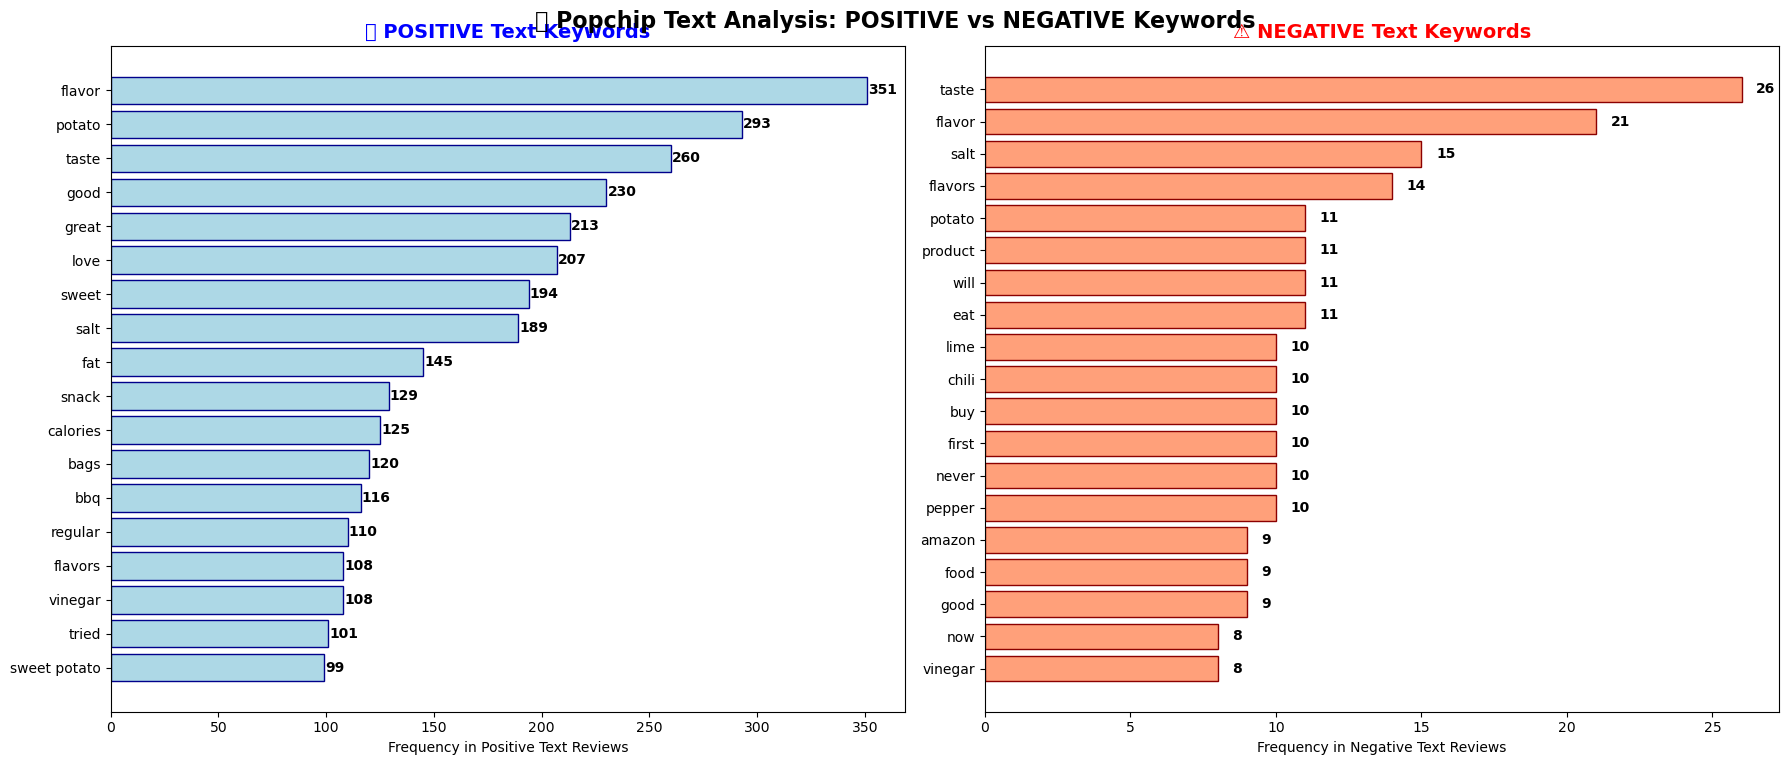


📈 TEXT ANALYSIS SUMMARY:
✅ Positive Text Reviews: 511
⚠️ Negative Text Reviews: 44


In [ ]:
# NEW CELL - Text Keywords: Positive vs Negative Comparison

print("TEXT KEYWORDS ANALYSIS: POSITIVE vs NEGATIVE")
print("=" * 55)

# Create subplot with 1x2 layout for text comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: POSITIVE Text Keywords (Left)
if not positive_keywords_df.empty:
    y_pos = range(len(positive_keywords_df))
    ax1.barh(y_pos, positive_keywords_df['Frequency'], color='lightblue', edgecolor='darkblue')
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(positive_keywords_df['Keyword'])
    ax1.set_xlabel('Frequency in Positive Text Reviews')
    ax1.set_title('✅ POSITIVE Text Keywords', fontsize=14, fontweight='bold', color='blue')
    ax1.invert_yaxis()
    
    # Add frequency labels
    for i, freq in enumerate(positive_keywords_df['Frequency']):
        ax1.text(freq + 0.5, i, str(freq), va='center', fontweight='bold')
else:
    ax1.text(0.5, 0.5, 'No Positive\nText Data', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=16, color='gray')
    ax1.set_title('✅ POSITIVE Text Keywords', fontsize=14, fontweight='bold', color='blue')

# Chart 2: NEGATIVE Text Keywords (Right)
if not negative_keywords_df.empty:
    y_pos = range(len(negative_keywords_df))
    ax2.barh(y_pos, negative_keywords_df['Frequency'], color='lightsalmon', edgecolor='darkred')
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(negative_keywords_df['Keyword'])
    ax2.set_xlabel('Frequency in Negative Text Reviews')
    ax2.set_title('⚠️ NEGATIVE Text Keywords', fontsize=14, fontweight='bold', color='red')
    ax2.invert_yaxis()
    
    # Add frequency labels
    for i, freq in enumerate(negative_keywords_df['Frequency']):
        ax2.text(freq + 0.5, i, str(freq), va='center', fontweight='bold')
else:
    ax2.text(0.5, 0.5, '🎉 EXCELLENT!\n\nNo Negative\nText Reviews', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=16, color='green', fontweight='bold')
    ax2.set_title('⚠️ NEGATIVE Text Keywords', fontsize=14, fontweight='bold', color='red')

plt.subtitle('🍿 Popchip Text Analysis: POSITIVE vs NEGATIVE Keywords', 
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# Text summary statistics
print(f"\n📈 TEXT ANALYSIS SUMMARY:")
print(f"✅ Positive Text Reviews: {len(positive_text_list) if 'positive_text_list' in locals() and len(positive_text_list) > 0 else 0}")
print(f"⚠️ Negative Text Reviews: {len(negative_text_list) if 'negative_text_list' in locals() and len(negative_text_list) > 0 else 0}")

☁️ COMPLETE WORD CLOUD ANALYSIS: POSITIVE vs NEGATIVE
✅ Creating POSITIVE word clouds...
⚠️ Creating NEGATIVE word clouds...


C:\Users\kojus\AppData\Local\Temp\ipykernel_16540\1910235918.py:97: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


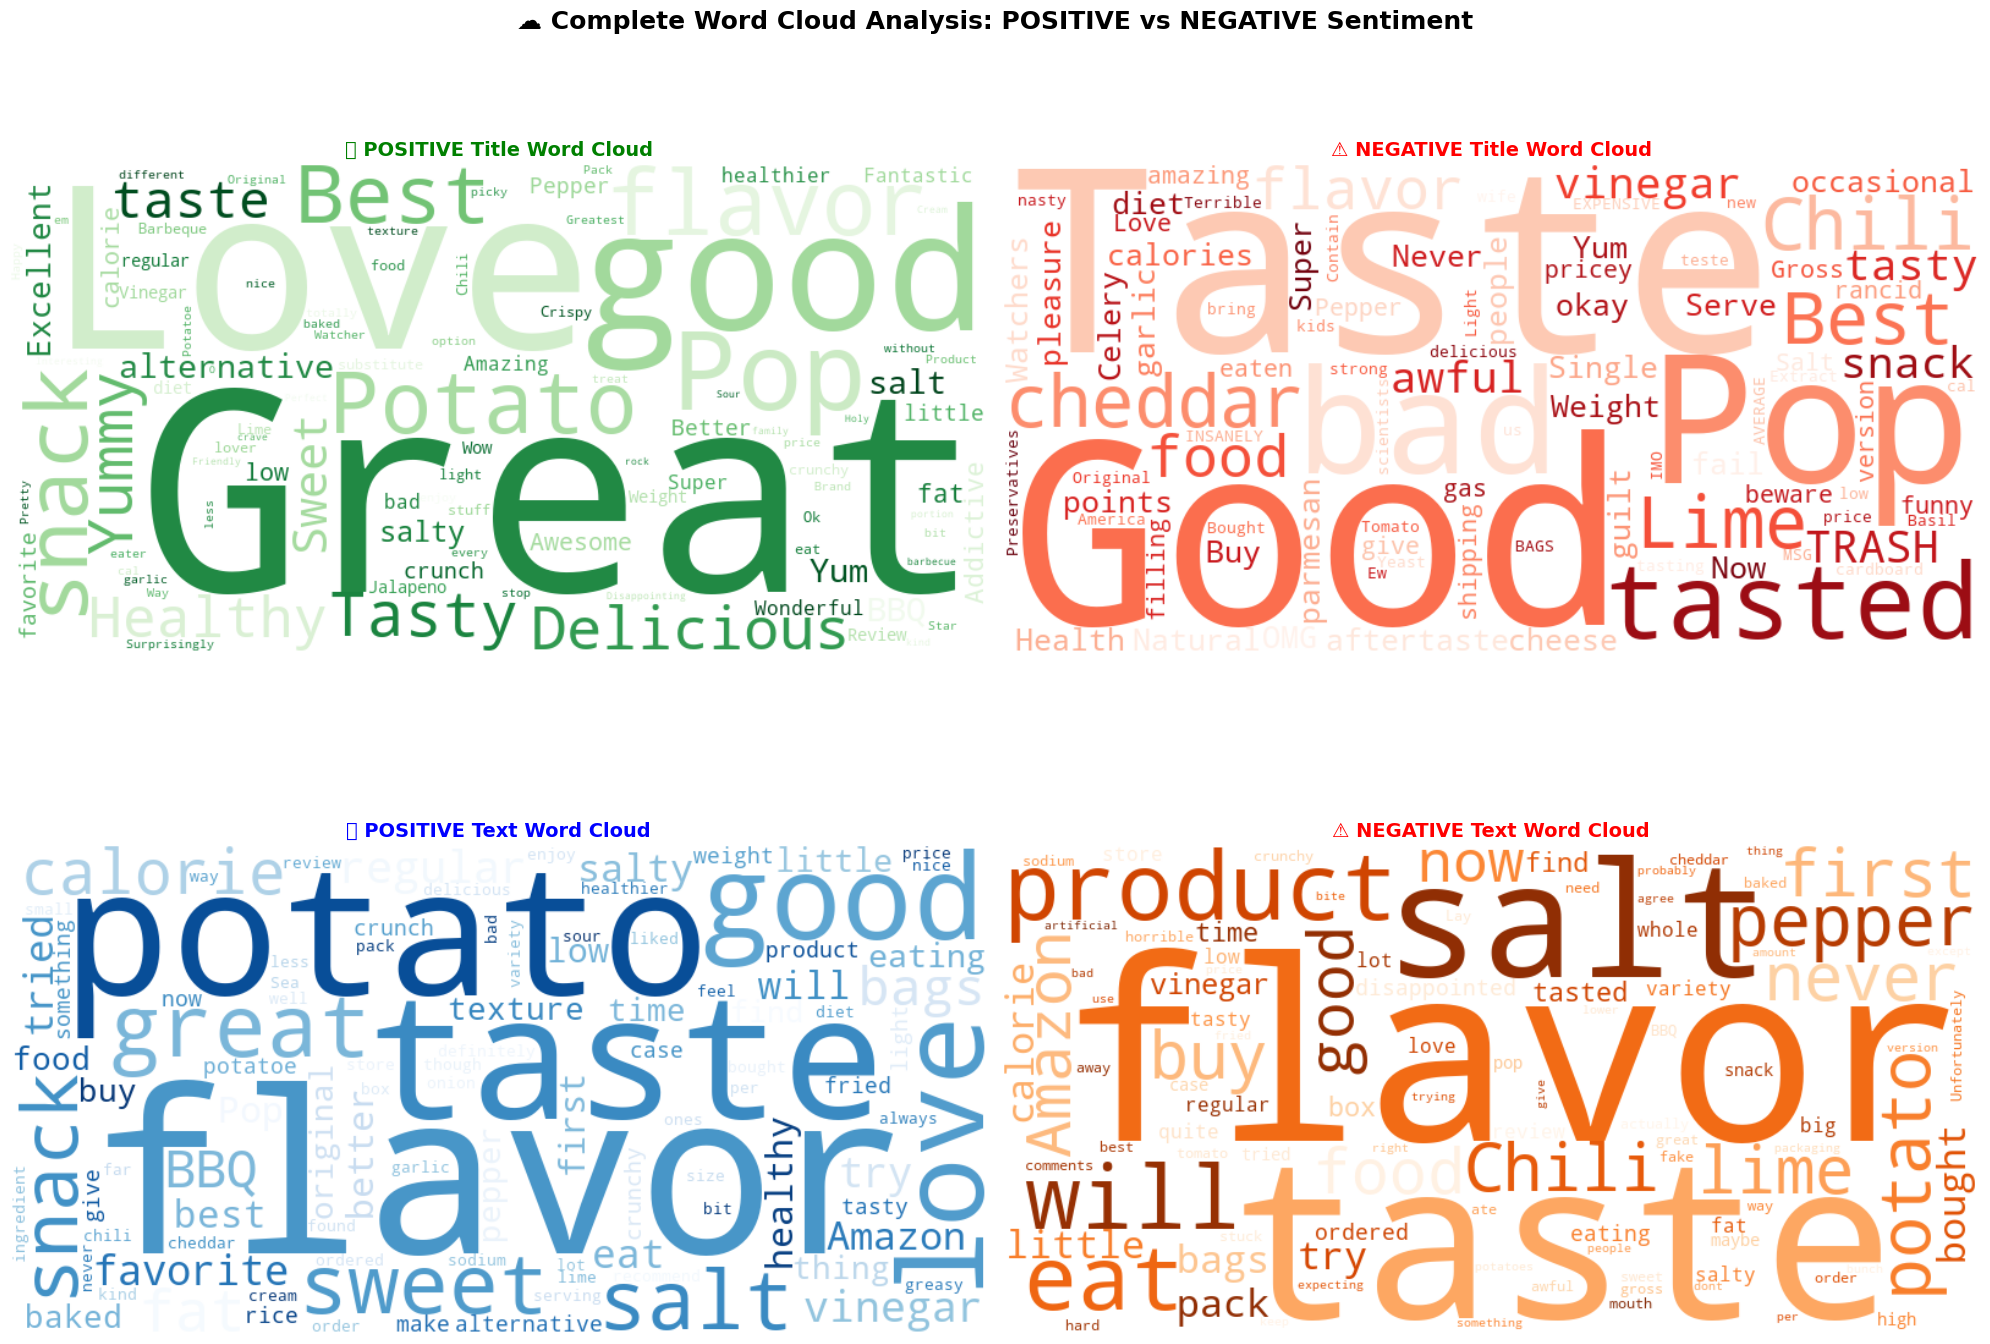


✅ Word cloud analysis complete!
📊 Positive reviews analyzed: 1022 total
⚠️ Negative reviews analyzed: 88 total


In [188]:
# NEW CELL - Complete Word Cloud Analysis: Positive vs Negative

print("☁️ COMPLETE WORD CLOUD ANALYSIS: POSITIVE vs NEGATIVE")
print("=" * 60)

# Create Positive Word Clouds
print("✅ Creating POSITIVE word clouds...")

# Positive Title Word Cloud
if len(positive_title_list) > 0:
    positive_title_text = ' '.join(df[df['sentiment_category'] == 'Positive']['Title'].values)
    positive_title_wordcloud = WordCloud(
        width=800, height=400, background_color='white', colormap='Greens',
        max_words=100, relative_scaling=0.6, stopwords=custom_stopwords, collocations=False
    ).generate(positive_title_text)
else:
    positive_title_wordcloud = None

# Positive Text Word Cloud  
if len(positive_text_list) > 0:
    positive_text_string = ' '.join(df[df['sentiment_category'] == 'Positive']['Text'].values)
    positive_text_wordcloud = WordCloud(
        width=800, height=400, background_color='white', colormap='Blues',
        max_words=100, relative_scaling=0.6, stopwords=custom_stopwords, collocations=False
    ).generate(positive_text_string)
else:
    positive_text_wordcloud = None

# Create Negative Word Clouds
print("⚠️ Creating NEGATIVE word clouds...")

# Negative Title Word Cloud
if len(negative_title_list) > 0:
    negative_title_text = ' '.join(df[df['sentiment_category'] == 'Negative']['Title'].values)
    negative_title_wordcloud = WordCloud(
        width=800, height=400, background_color='white', colormap='Reds',
        max_words=100, relative_scaling=0.6, stopwords=custom_stopwords, collocations=False
    ).generate(negative_title_text)
else:
    negative_title_wordcloud = None

# Negative Text Word Cloud
if len(negative_text_list) > 0:
    negative_text_string = ' '.join(df[df['sentiment_category'] == 'Negative']['Text'].values)
    negative_text_wordcloud = WordCloud(
        width=800, height=400, background_color='white', colormap='Oranges',
        max_words=100, relative_scaling=0.6, stopwords=custom_stopwords, collocations=False
    ).generate(negative_text_string)
else:
    negative_text_wordcloud = None

# Display Word Clouds in 2x2 Grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Positive Title Word Cloud (Top-Left)
if positive_title_wordcloud:
    ax1.imshow(positive_title_wordcloud, interpolation='bilinear')
    ax1.set_title('✅ POSITIVE Title Word Cloud', fontsize=14, fontweight='bold', color='green')
else:
    ax1.text(0.5, 0.5, 'No Positive\nTitle Data', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=16, color='gray')
    ax1.set_title('✅ POSITIVE Title Word Cloud', fontsize=14, fontweight='bold', color='green')
ax1.axis('off')

# Negative Title Word Cloud (Top-Right)
if negative_title_wordcloud:
    ax2.imshow(negative_title_wordcloud, interpolation='bilinear')
    ax2.set_title('⚠️ NEGATIVE Title Word Cloud', fontsize=14, fontweight='bold', color='red')
else:
    ax2.text(0.5, 0.5, '🎉 EXCELLENT!\n\nNo Negative\nTitle Reviews', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=16, color='green', fontweight='bold')
    ax2.set_title('⚠️ NEGATIVE Title Word Cloud', fontsize=14, fontweight='bold', color='red')
ax2.axis('off')

# Positive Text Word Cloud (Bottom-Left)
if positive_text_wordcloud:
    ax3.imshow(positive_text_wordcloud, interpolation='bilinear')
    ax3.set_title('✅ POSITIVE Text Word Cloud', fontsize=14, fontweight='bold', color='blue')
else:
    ax3.text(0.5, 0.5, 'No Positive\nText Data', ha='center', va='center', 
             transform=ax3.transAxes, fontsize=16, color='gray')
    ax3.set_title('✅ POSITIVE Text Word Cloud', fontsize=14, fontweight='bold', color='blue')
ax3.axis('off')

# Negative Text Word Cloud (Bottom-Right)
if negative_text_wordcloud:
    ax4.imshow(negative_text_wordcloud, interpolation='bilinear')
    ax4.set_title('⚠️ NEGATIVE Text Word Cloud', fontsize=14, fontweight='bold', color='red')
else:
    ax4.text(0.5, 0.5, '🎉 EXCELLENT!\n\nNo Negative\nText Reviews', ha='center', va='center', 
             transform=ax4.transAxes, fontsize=16, color='green', fontweight='bold')
    ax4.set_title('⚠️ NEGATIVE Text Word Cloud', fontsize=14, fontweight='bold', color='red')
ax4.axis('off')

plt.suptitle('☁️ Complete Word Cloud Analysis: POSITIVE vs NEGATIVE Sentiment', 
             fontsize=18, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

print(f"\n✅ Word cloud analysis complete!")
print(f"📊 Positive reviews analyzed: {len(positive_text_list) + len(positive_title_list)} total")
print(f"⚠️ Negative reviews analyzed: {len(negative_text_list) + len(negative_title_list)} total")

In [ ]:
# NEW CELL - Complete Business Insights

print("🎯 COMPLETE SENTIMENT ANALYSIS INSIGHTS")
print("=" * 50)

# Calculate comprehensive metrics
total_positive = len(df[df['sentiment_category'] == 'Positive'])
total_negative = len(df[df['sentiment_category'] == 'Negative'])
total_neutral = len(df[df['sentiment_category'] == 'Neutral'])

print(f"\n📊 OVERALL SENTIMENT BREAKDOWN:")
print(f"✅ Positive Reviews: {total_positive} ({total_positive/len(df)*100:.1f}%)")
print(f"⚠️ Negative Reviews: {total_negative} ({total_negative/len(df)*100:.1f}%)")
print(f"😐 Neutral Reviews: {total_neutral} ({total_neutral/len(df)*100:.1f}%)")

print(f"\n🔍 KEY FINDINGS:")
if total_positive > total_negative * 3:
    print("🎉 EXCELLENT: Overwhelmingly positive customer feedback!")
    print("📈 RECOMMENDATION: Scale marketing efforts and expand product line")
elif total_positive > total_negative:
    print("✅ GOOD: More positive than negative feedback")
    print("🔧 RECOMMENDATION: Address negative issues while amplifying positives")
else:
    print("🚨 CONCERN: High negative feedback requires immediate attention")
    print("⏸️ RECOMMENDATION: Focus on product improvements before scaling")

# Top positive vs negative keywords comparison
if not positive_keywords_df.empty and not negative_keywords_df.empty:
    print(f"\n⚔️ POSITIVE vs NEGATIVE KEYWORD BATTLE:")
    print(f"🏆 Top Positive Keyword: '{positive_keywords_df.iloc[0]['Keyword']}' ({positive_keywords_df.iloc[0]['Frequency']} mentions)")
    print(f"⚠️ Top Negative Keyword: '{negative_keywords_df.iloc[0]['Keyword']}' ({negative_keywords_df.iloc[0]['Frequency']} mentions)")
    
    # Provide actionable recommendations
    print(f"\n💡 ACTIONABLE RECOMMENDATIONS:")
    print(f"1. MARKETING: Emphasize '{positive_keywords_df.iloc[0]['Keyword']}' in campaigns")
    print(f"2. PRODUCT: Address '{negative_keywords_df.iloc[0]['Keyword']}' concerns")
    print(f"3. A/B TESTING: Compare positive keyword messaging vs generic content")

print(f"\n🚀 READY FOR IMPLEMENTATION!")

🎯 COMPLETE SENTIMENT ANALYSIS INSIGHTS

📊 OVERALL SENTIMENT BREAKDOWN:
✅ Positive Reviews: 511 (90.6%)
⚠️ Negative Reviews: 44 (7.8%)
😐 Neutral Reviews: 9 (1.6%)

🔍 KEY FINDINGS:
🎉 EXCELLENT: Overwhelmingly positive customer feedback!
📈 RECOMMENDATION: Scale marketing efforts and expand product line

⚔️ POSITIVE vs NEGATIVE KEYWORD BATTLE:
🏆 Top Positive Keyword: 'flavor' (351 mentions)
⚠️ Top Negative Keyword: 'taste' (26 mentions)

💡 ACTIONABLE RECOMMENDATIONS:
1. MARKETING: Emphasize 'flavor' in campaigns
2. PRODUCT: Address 'taste' concerns
3. A/B TESTING: Compare positive keyword messaging vs generic content

🚀 READY FOR IMPLEMENTATION!


: 

---

## <span style="color: #87CEEB;">6. Business Analysis: Sentiment + Text Insights</span>
Translating word cloud and sentiment findings into actionable business intelligence.